In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Functions import *

# Import ground truth data

In [5]:
infected = pd.read_csv('South_Africa_save/South_Africa_infected.csv')
removed = pd.read_csv('South_Africa_save/South_Africa_removed.csv')

it=infected.to_numpy()
rt=removed.to_numpy()

split=[60,313,473]

i1=it[split[0]:split[1]]
r1=rt[split[0]:split[1]]
i2=it[split[1]:split[2]]
r2=rt[split[1]:split[2]]
i3=it[split[2]:]
r3=it[split[2]:]

ii1=i1.reshape((i1.shape[0],))
rr1=r1.reshape((r1.shape[0],))
ii2=i2.reshape((i2.shape[0],))
rr2=r2.reshape((r2.shape[0],))
ii3=i3.reshape((i3.shape[0],))
rr3=r3.reshape((r3.shape[0],))

N=58560000
inf1=ii1/N
rem1=rr1/N
inf2=ii2/N
rem2=rr2/N
inf3=ii3/N
rem3=rr3/N

# Import parameters

In [20]:
y_train=pd.read_csv('South_Africa_save/y_train.csv')
y_train=y_train.drop(['Unnamed: 0'],axis=1)

y_predict1=np.load('South_Africa_save/y_prediction1.npy')
y_predict2=np.load('South_Africa_save/y_prediction2.npy')
y_predict3=np.load('South_Africa_save/y_prediction3.npy')

predict1_1=np.load('South_Africa_save/predict1_1.npy')
predict1_2=np.load('South_Africa_save/predict1_2.npy')
predict1_3=np.load('South_Africa_save/predict1_3.npy')

predict2_1=np.load('South_Africa_save/predict2_1.npy')
predict2_2=np.load('South_Africa_save/predict2_2.npy')
predict2_3=np.load('South_Africa_save/predict2_3.npy')

predict3_1=np.load('South_Africa_save/predict3_1.npy')
predict3_2=np.load('South_Africa_save/predict3_2.npy')
predict3_3=np.load('South_Africa_save/predict3_3.npy')

predict_low3_1=np.load('South_Africa_save/predict_low3_1.npy')
predict_low3_2=np.load('South_Africa_save/predict_low3_2.npy')
predict_low3_3=np.load('South_Africa_save/predict_low3_3.npy')

In [7]:
split=[151,151+116,151+116+15]
y_train1=y_train[:split[0]]
y_train2=y_train[split[0]:split[1]]
y_train3=y_train[split[1]:]

y_predict1_1=y_predict1[:split[0]]
y_predict1_2=y_predict1[split[0]:split[1]]
y_predict1_3=y_predict1[split[1]:]

y_predict2_1=y_predict2[:split[0]]
y_predict2_2=y_predict2[split[0]:split[1]]
y_predict2_3=y_predict2[split[1]:]

y_predict3_1=y_predict3[:split[0]]
y_predict3_2=y_predict3[split[0]:split[1]]
y_predict3_3=y_predict3[split[1]:]

In [8]:
y_train1=y_train1.to_numpy()
y_train2=y_train2.to_numpy()
y_train3=y_train3.to_numpy()

In [9]:
index1=np.load('South_Africa_save/fit_index1.npy')
index2=np.load('South_Africa_save/fit_index2.npy')
index3=np.load('South_Africa_save/fit_index3.npy')

# Plot to see how the neural network does

In [10]:
def plot3(inf,rem,p_fit,p_pre):
    
    x=range(len(inf))
    y0=[1-inf[0]-rem[0],inf[0],rem[0]]
    i_fit=g2(x,y0,p_fit)
    i_pre=g2(x,y0,p_pre)
    
    plt.plot(x,inf,label='true infection')
    plt.plot(x,i_fit[:,1],label='fitted infection')
    plt.plot(x,i_pre[:,1],label='infection predicted from policy')
    plt.legend()
    plt.show()
    
def segments(inf,rem,p_fit,p_pre,points):
    for p in points:
        plot3(inf[:p],rem[:p],[float(p_fit[p-1:p]['beta']),float(y_train1[p-1:p]['gamma'])],p_pre[p-1])
        

## Performance of model1

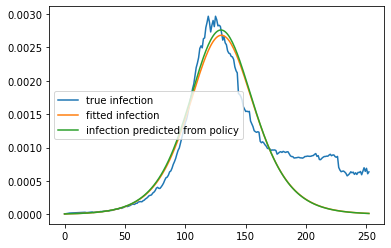

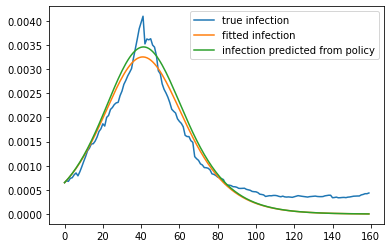

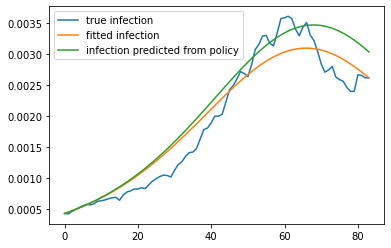

In [11]:
plot3(inf1,rem1,y_train1[-1],y_predict1_1[-1])
plot3(inf2,rem2,y_train2[-1],y_predict1_2[-1])
plot3(inf3,rem3,y_train3[-1],y_predict1_3[-1])

## Performance of model2

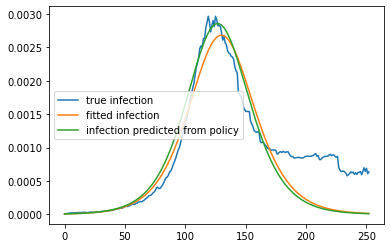

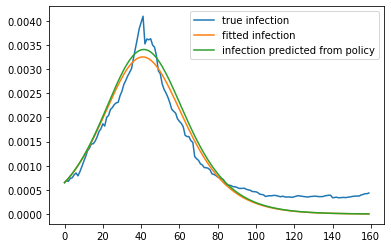

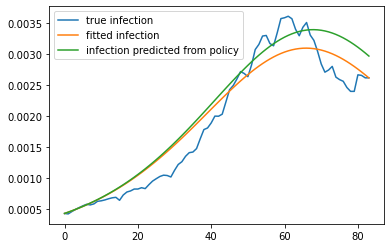

In [12]:
plot3(inf1,rem1,y_train1[-1],y_predict2_1[-1])
plot3(inf2,rem2,y_train2[-1],y_predict2_2[-1])
plot3(inf3,rem3,y_train3[-1],y_predict2_3[-1])

## Performance of model3

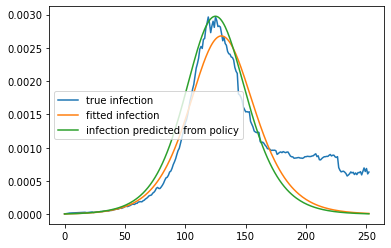

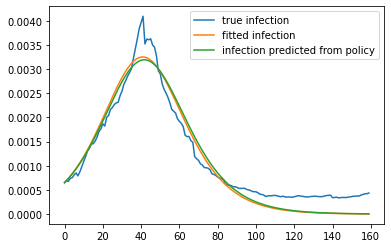

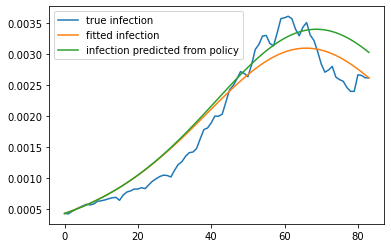

In [13]:
plot3(inf1,rem1,y_train1[-1],y_predict3_1[-1])
plot3(inf2,rem2,y_train2[-1],y_predict3_2[-1])
plot3(inf3,rem3,y_train3[-1],y_predict3_3[-1])

# Effect of hypothetical policies

In [14]:
def plot4(inf,rem,p_fit,p_pre):
    
    x=range(len(inf))
    y0=[1-inf[0]-rem[0],inf[0],rem[0]]
    i_fit=g2(x,y0,p_fit)
    i_pre=g2(x,y0,p_pre)
    
    plt.plot(x,inf,label='true infection')
    plt.plot(x,i_fit[:,1],label='infection predicted from actual policy',color='C2')
    plt.plot(x,i_pre[:,1],label='infection predicted from hypothetical policy',color='C3')
    plt.legend()
    plt.show()

## model1

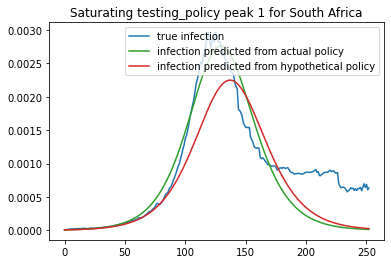

[0.79327734 0.74076132]


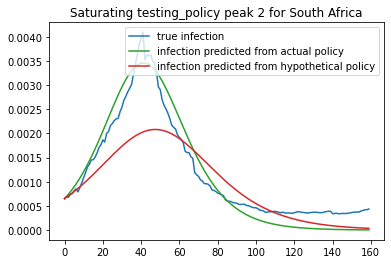

[0.88745379 0.81395311]


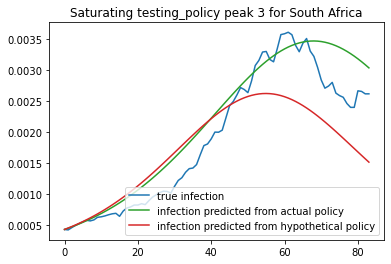

[0.63218176 0.58630895]


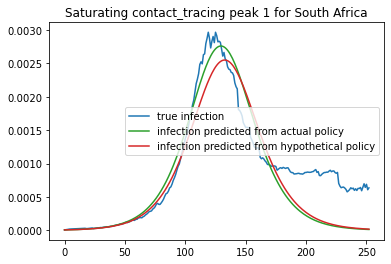

[0.78434191 0.72908082]


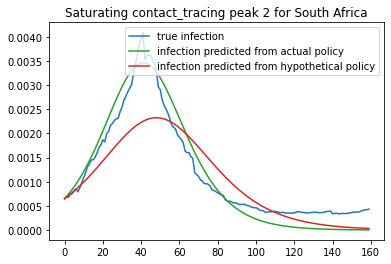

[0.88673111 0.81283366]


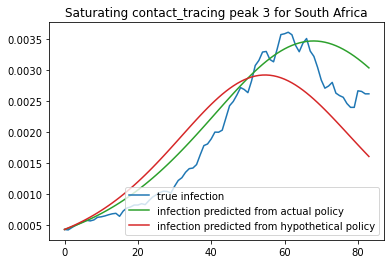

[0.60840571 0.56073219]


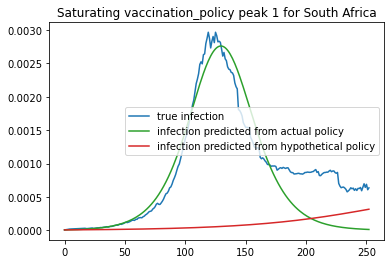

[0.53637844 0.51957319]


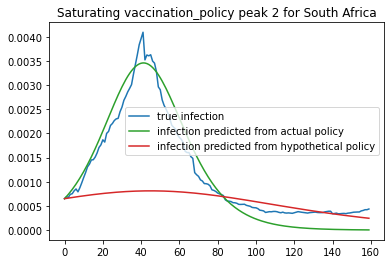

[0.63784657 0.59013671]


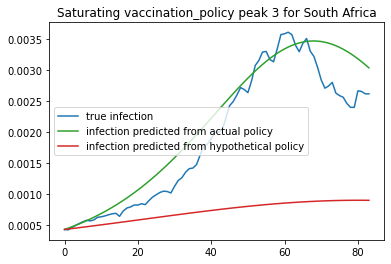

[0.47892038 0.44032924]


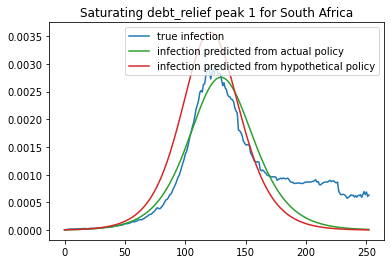

[0.76305946 0.69953267]


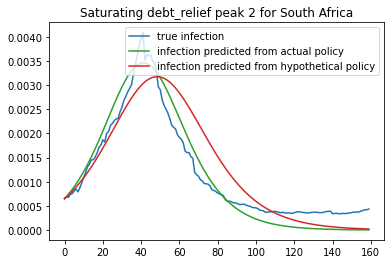

[0.88673111 0.81283366]


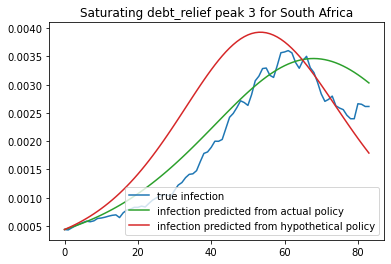

[0.60630916 0.547596  ]


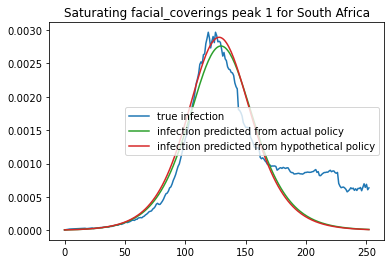

[0.77707674 0.71882643]


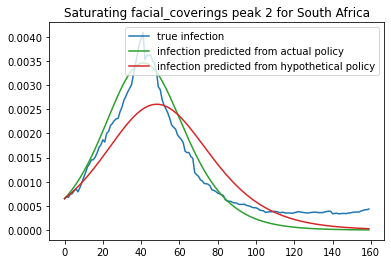

[0.88808356 0.80727839]


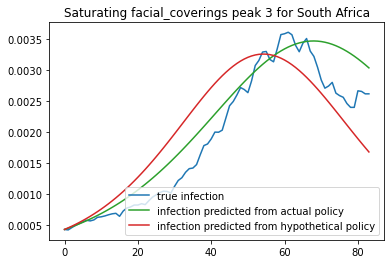

[0.61087342 0.56062361]


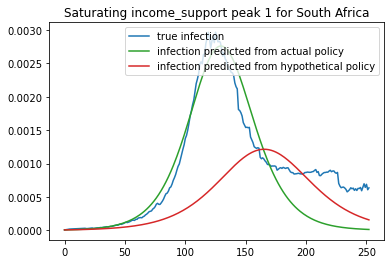

[0.81494202 0.77523002]


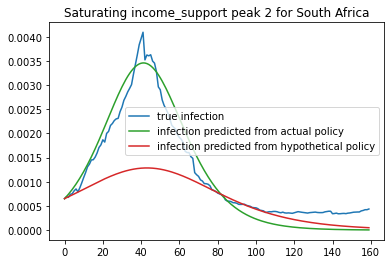

[0.90319135 0.85162159]


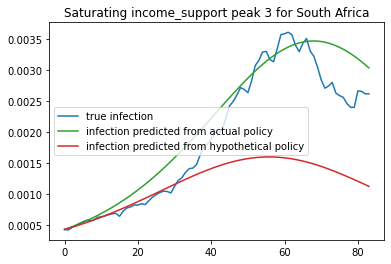

[0.66588881 0.64396153]


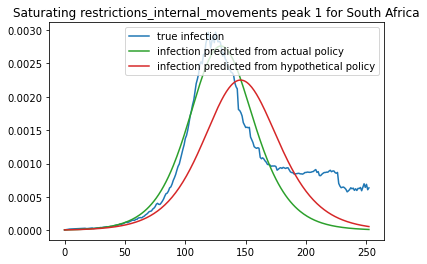

[0.74577064 0.69638811]


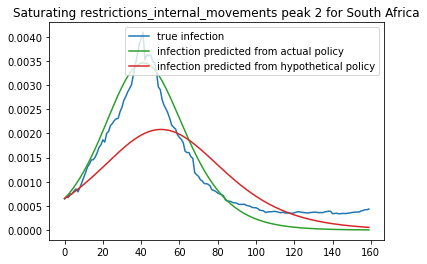

[0.53512385 0.51057606]


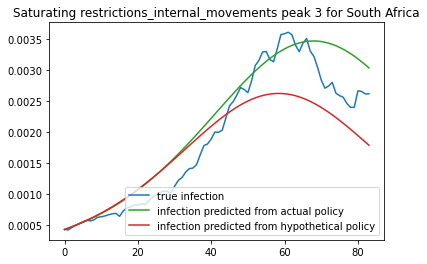

[0.38735066 0.38350841]


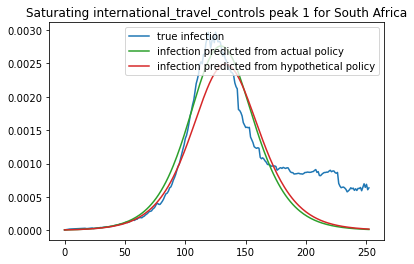

[0.78782391 0.73298154]


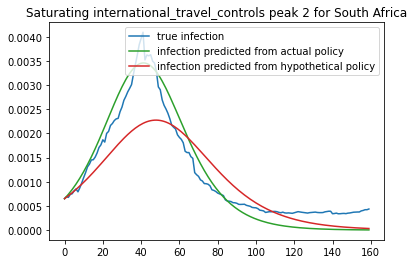

[0.94747123 0.88359189]


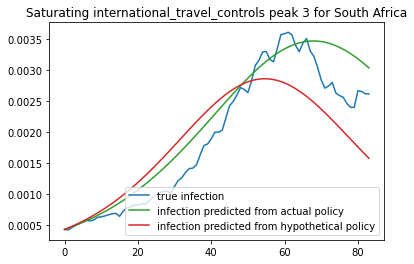

[0.71845757 0.67463444]


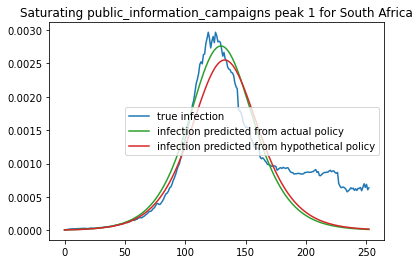

[0.78434191 0.72908082]


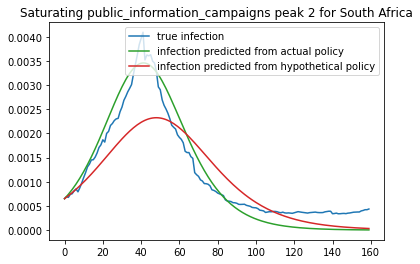

[0.88673111 0.81283366]


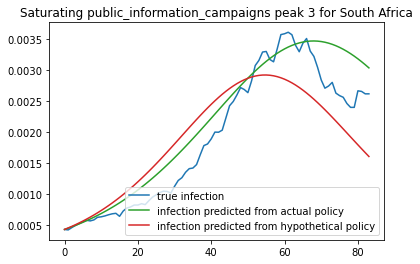

[0.60840571 0.56073219]


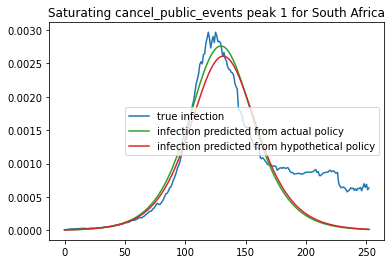

[0.78565761 0.72969111]


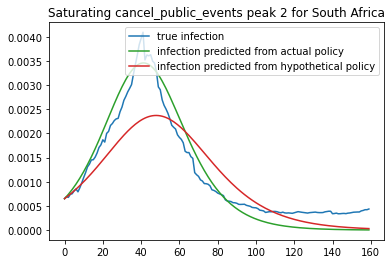

[0.89699264 0.81255919]


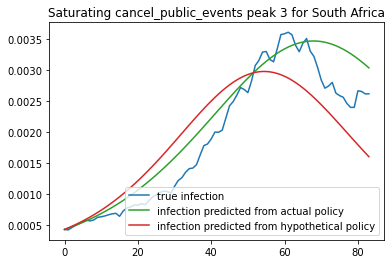

[0.63820022 0.58242832]


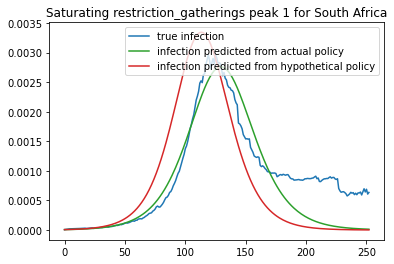

[0.83358224 0.7664179 ]


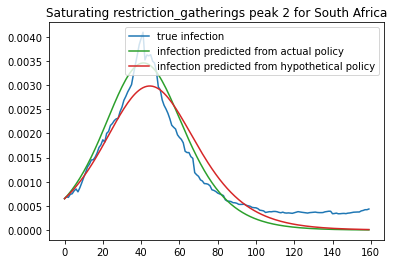

[0.92923306 0.84405812]


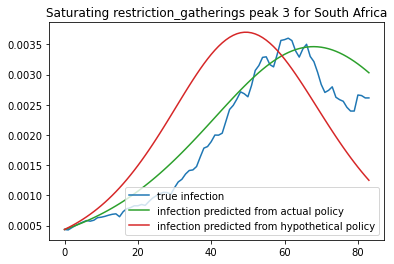

[0.66226636 0.59765451]


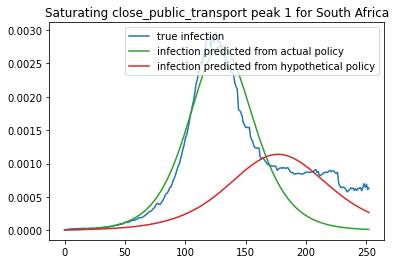

[0.77880063 0.74205187]


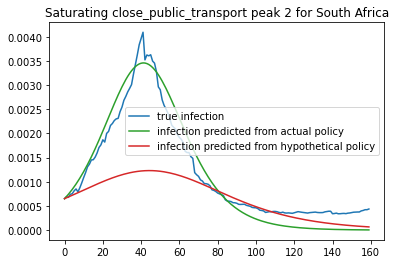

[0.88839932 0.81647633]


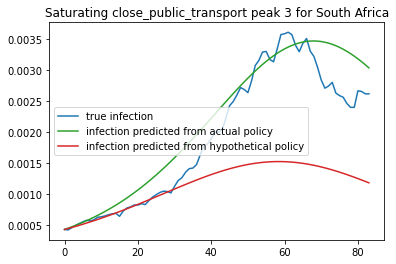

[0.61383469 0.57346906]


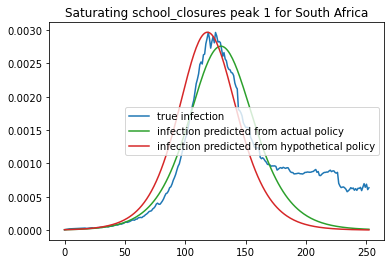

[0.83276823 0.76950501]


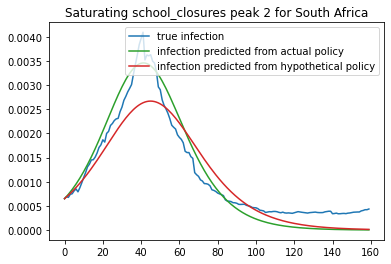

[1.03282598 0.93807962]


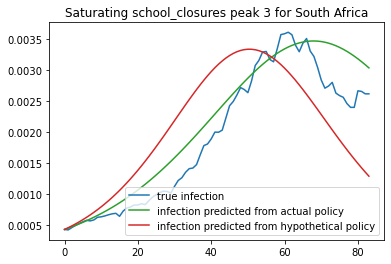

[0.78171474 0.71472048]


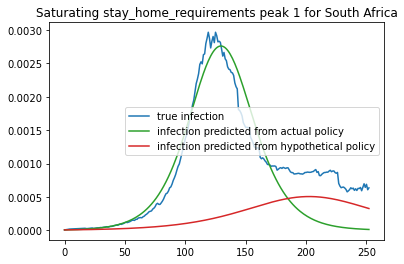

[0.88817742 0.86025335]


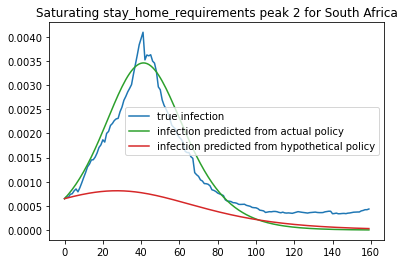

[0.94742771 0.89376889]


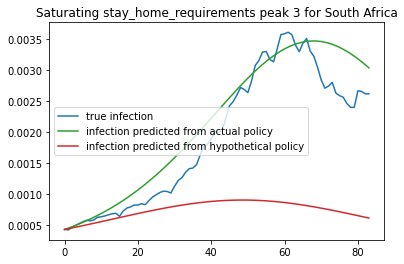

[0.67618769 0.63928079]


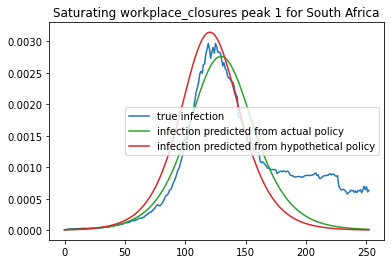

[0.80224653 0.73955588]


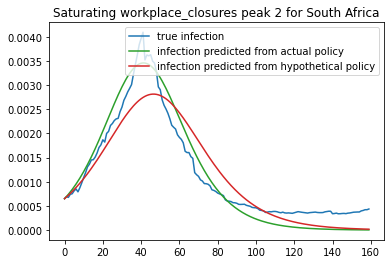

[0.89940315 0.81047837]


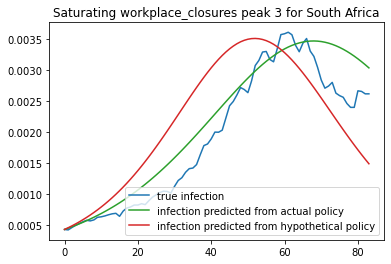

[0.64668171 0.58215582]


In [18]:
policy_name=['testing_policy', 'contact_tracing', 'vaccination_policy',
       'debt_relief', 'facial_coverings', 'income_support',
       'restrictions_internal_movements', 'international_travel_controls',
       'public_information_campaigns', 'cancel_public_events',
       'restriction_gatherings', 'close_public_transport', 'school_closures',
       'stay_home_requirements', 'workplace_closures']
for i in range(len(predict1_1)):
    plt.title('Saturating '+policy_name[i]+' peak 1 for South Africa')
    plot4(inf1,rem1,y_predict1_1[-1],predict1_1[i])
    print(predict1_1[i])
    plt.title('Saturating '+policy_name[i]+' peak 2 for South Africa')
    plot4(inf2,rem2,y_predict1_2[-1],predict1_1[i])
    print(predict1_2[i])
    plt.title('Saturating '+policy_name[i]+' peak 3 for South Africa')
    plot4(inf3,rem3,y_predict1_3[-1],predict1_1[i])
    print(predict1_3[i])

## model2

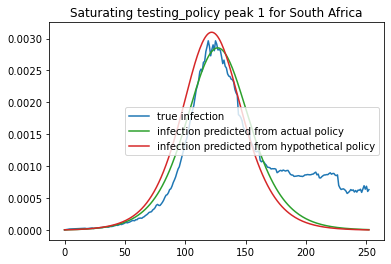

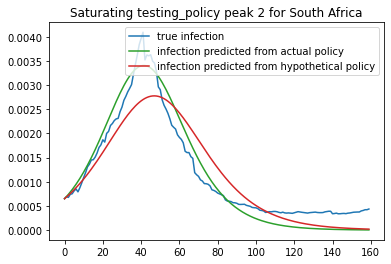

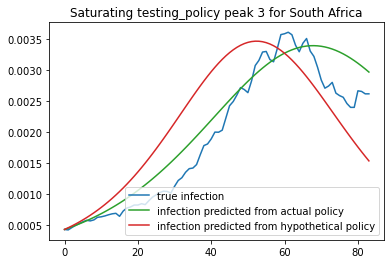

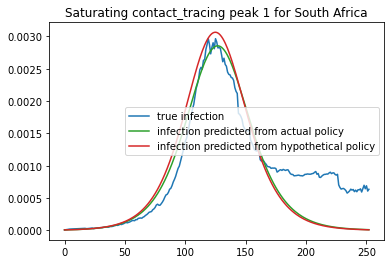

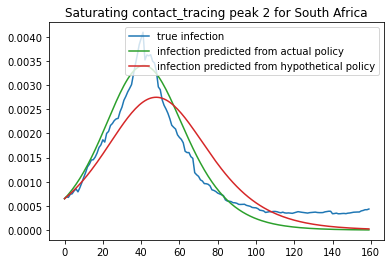

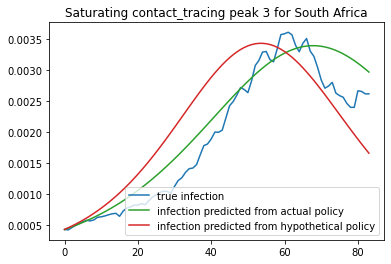

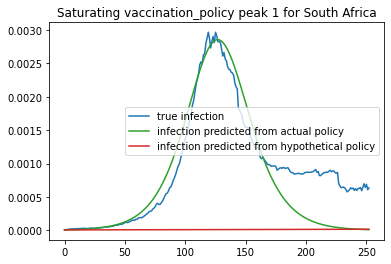

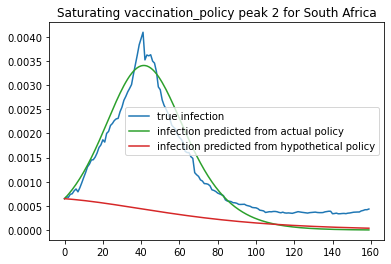

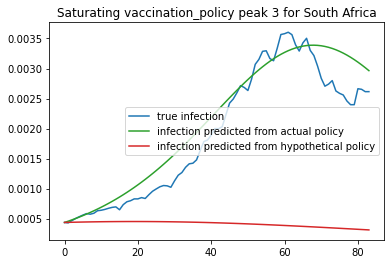

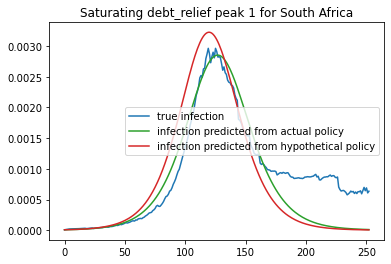

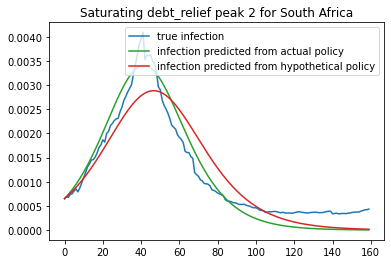

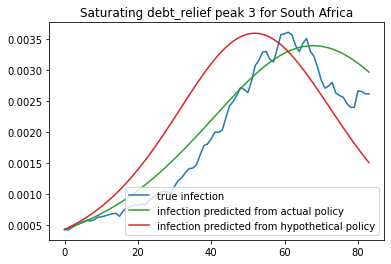

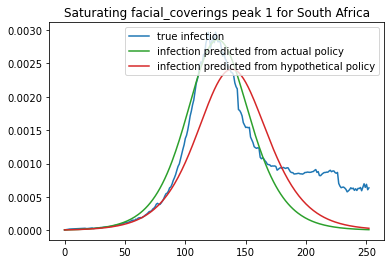

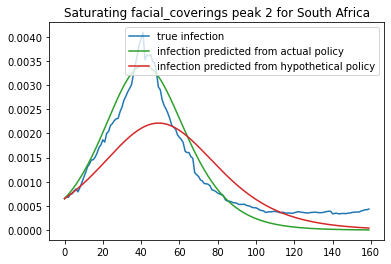

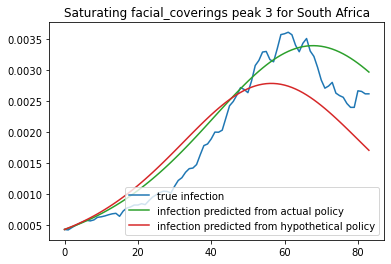

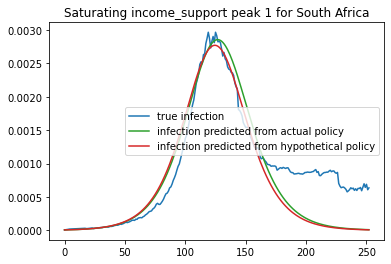

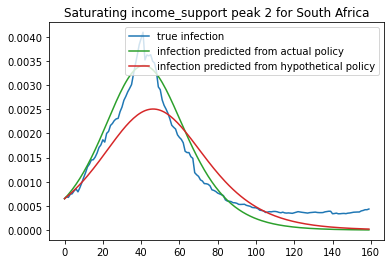

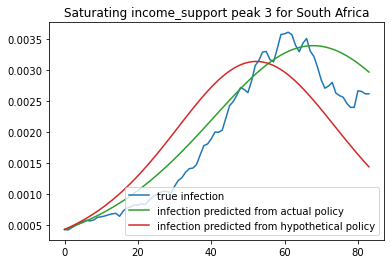

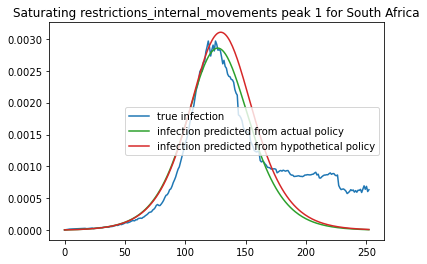

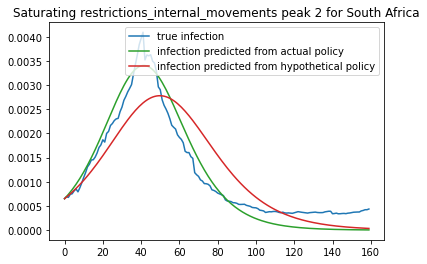

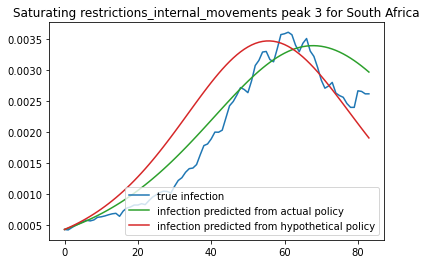

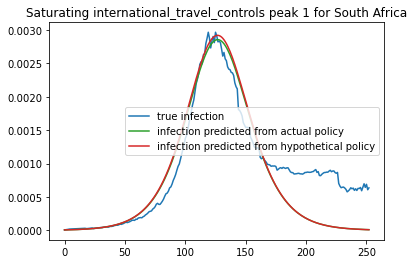

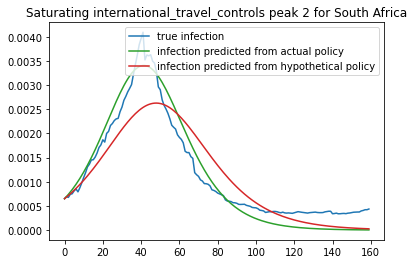

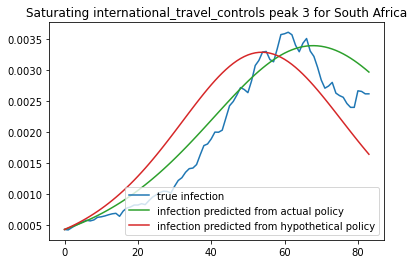

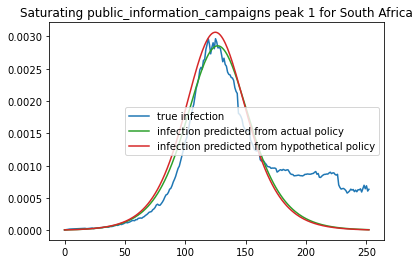

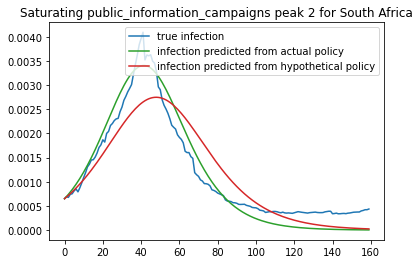

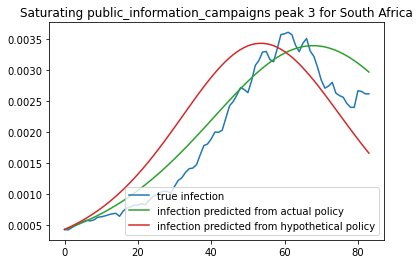

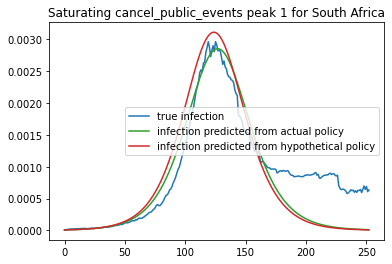

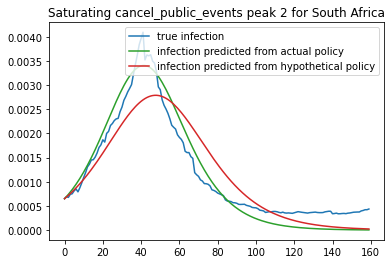

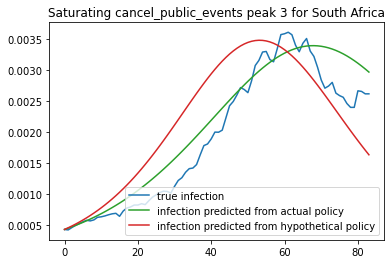

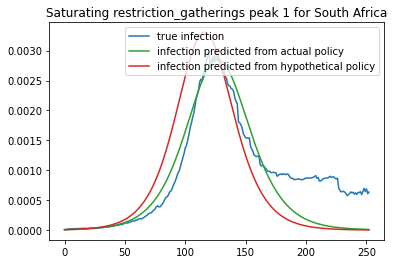

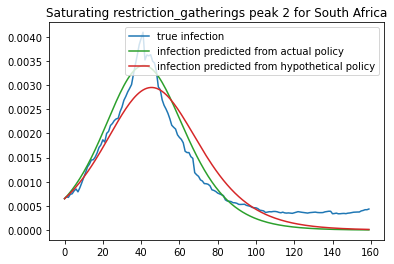

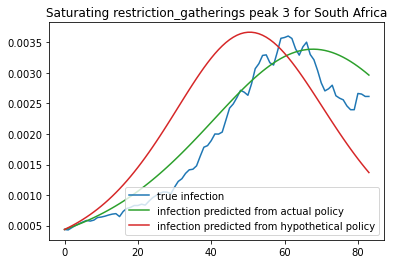

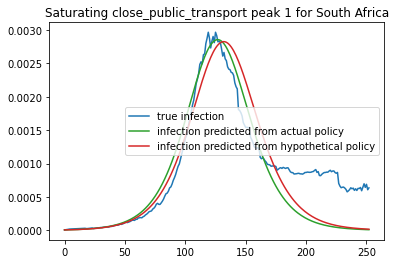

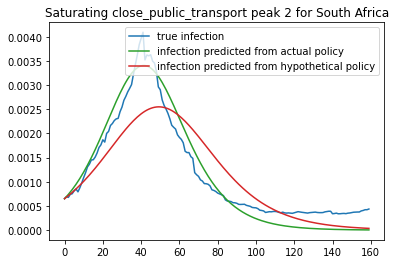

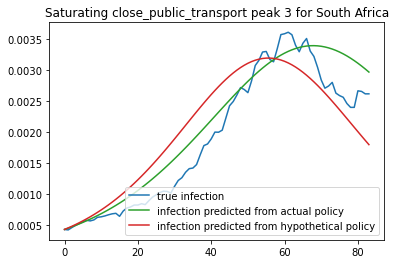

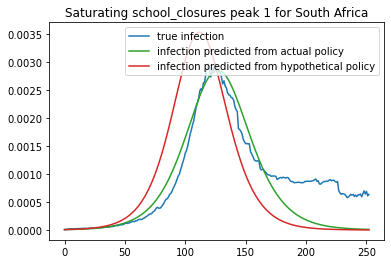

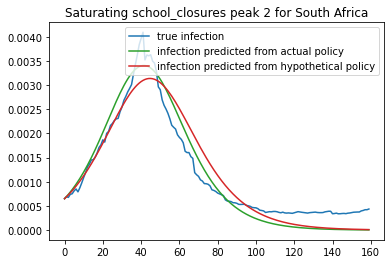

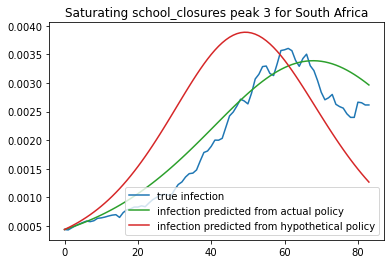

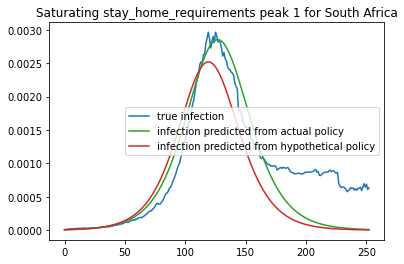

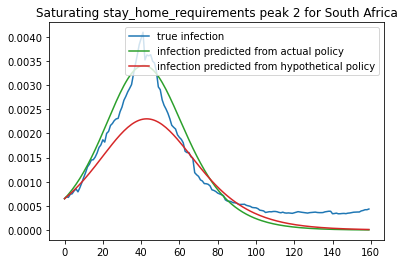

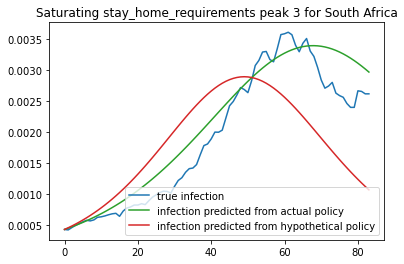

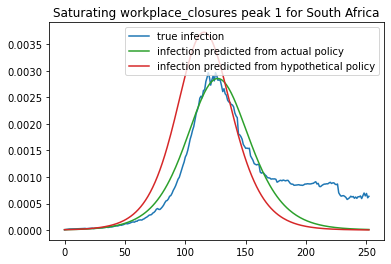

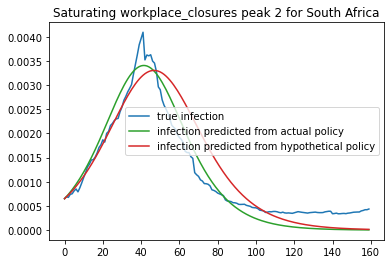

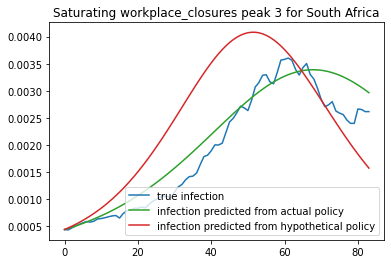

In [16]:
for i in range(len(predict1_1)):
    plt.title('Saturating '+policy_name[i]+' peak 1 for South Africa')
    plot4(inf1,rem1,y_predict2_1[-1],predict2_1[i])
    plt.title('Saturating '+policy_name[i]+' peak 2 for South Africa')
    plot4(inf2,rem2,y_predict2_2[-1],predict2_1[i])
    plt.title('Saturating '+policy_name[i]+' peak 3 for South Africa')
    plot4(inf3,rem3,y_predict2_3[-1],predict2_1[i])

## model3

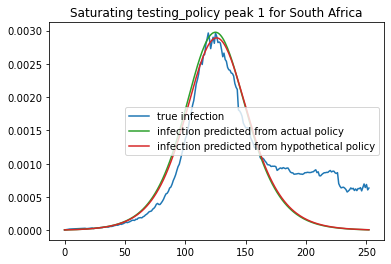

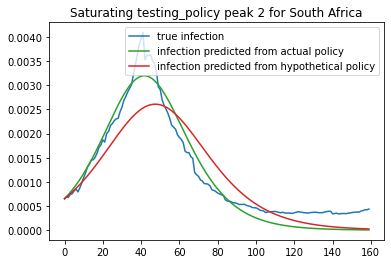

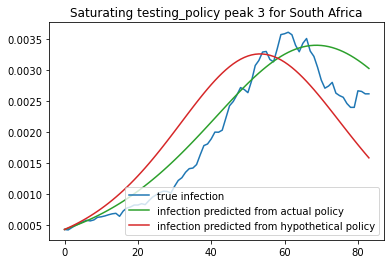

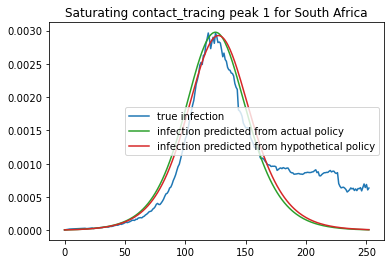

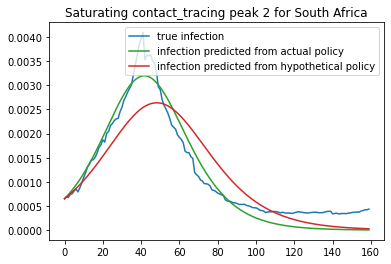

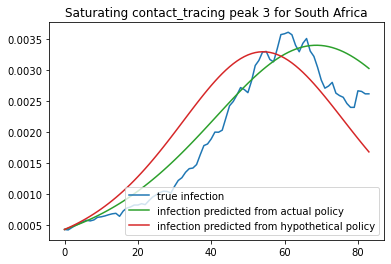

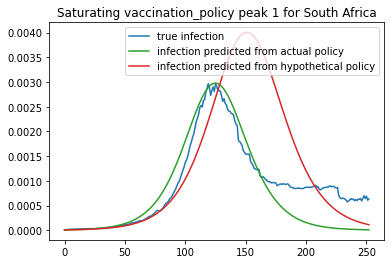

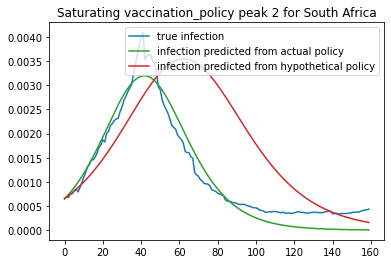

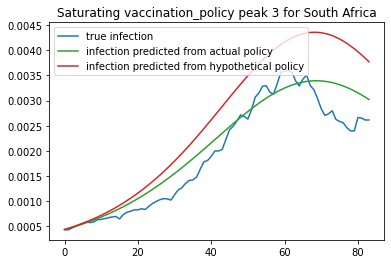

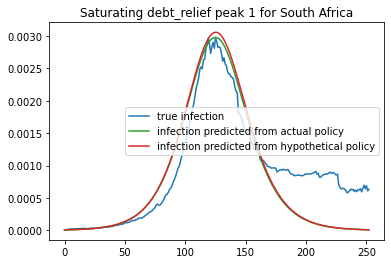

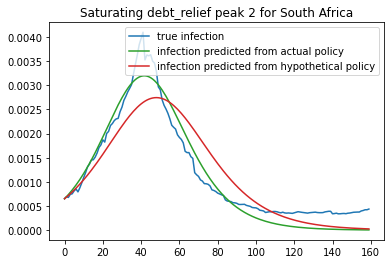

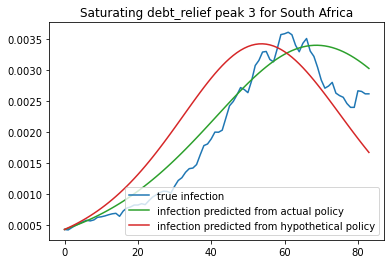

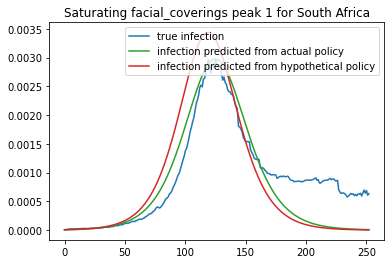

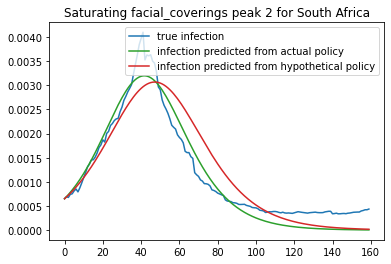

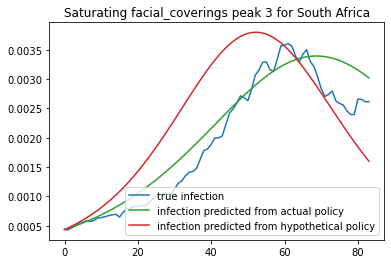

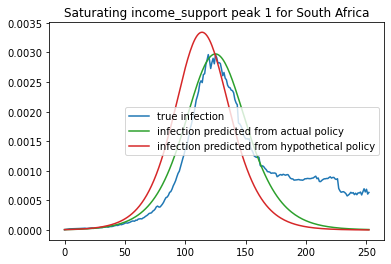

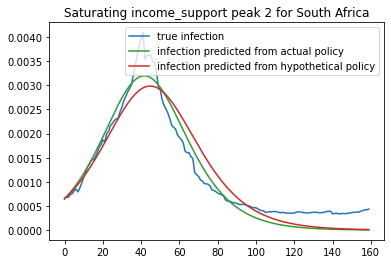

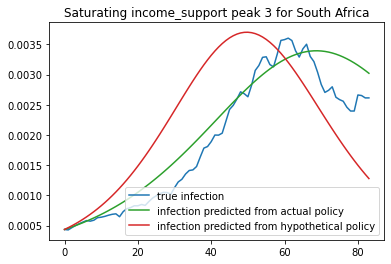

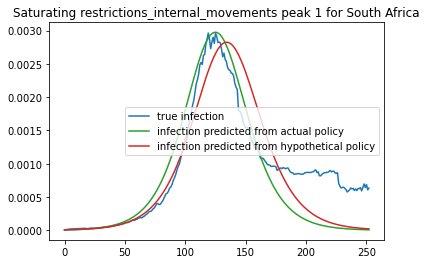

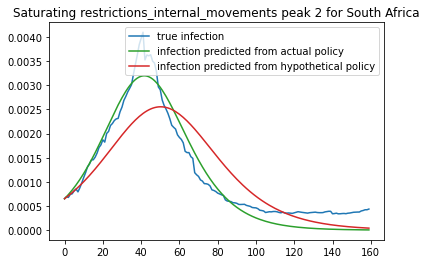

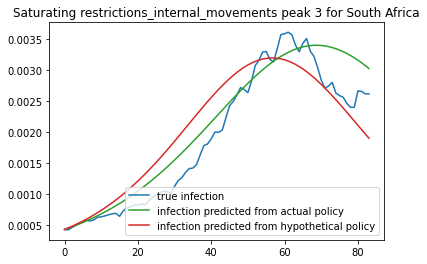

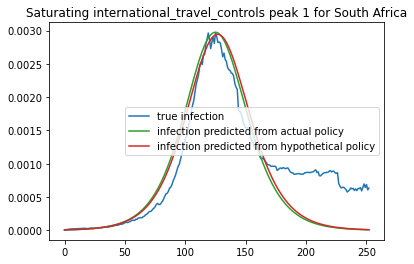

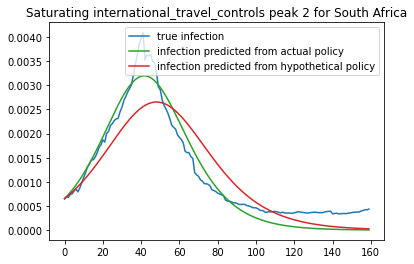

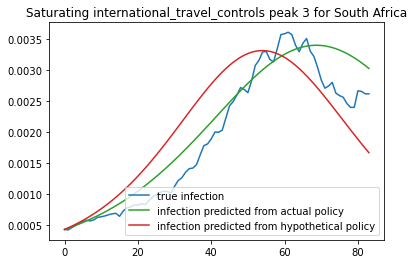

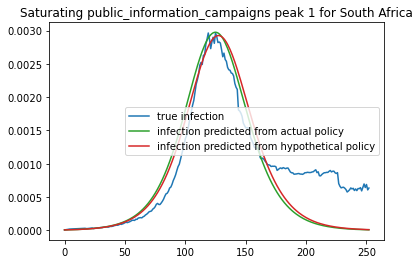

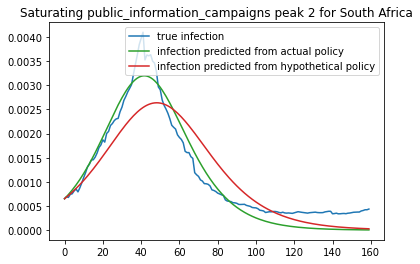

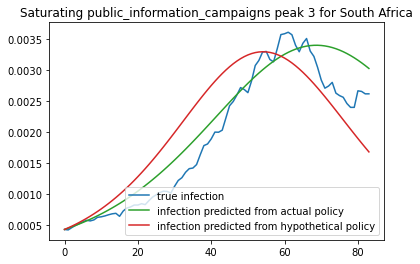

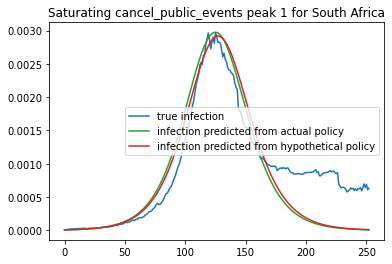

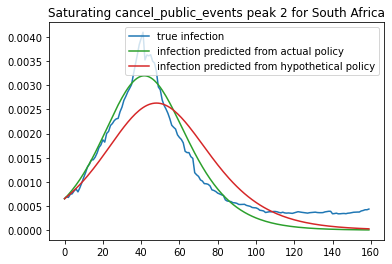

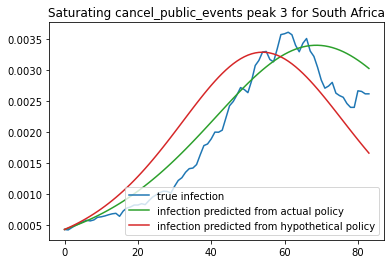

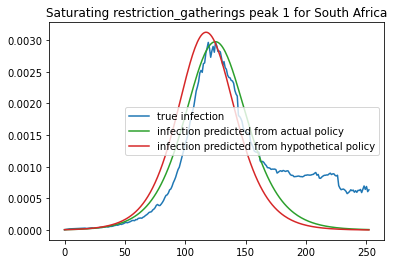

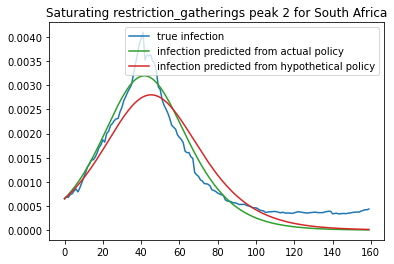

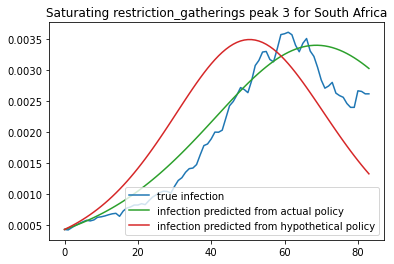

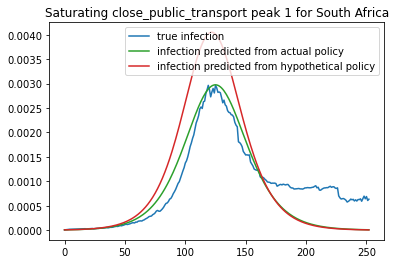

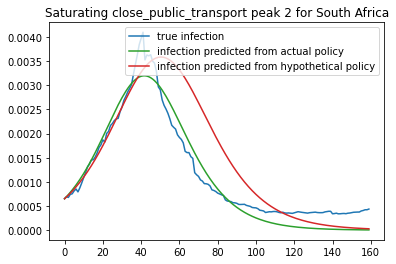

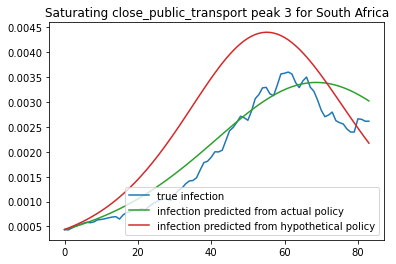

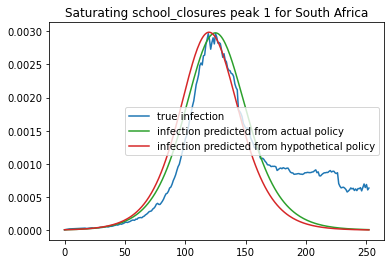

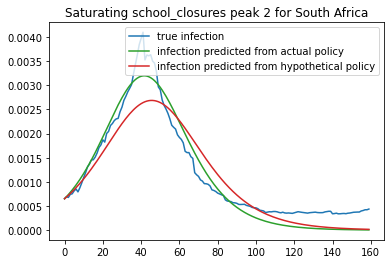

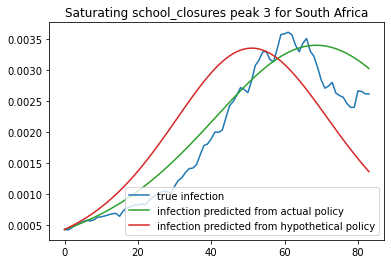

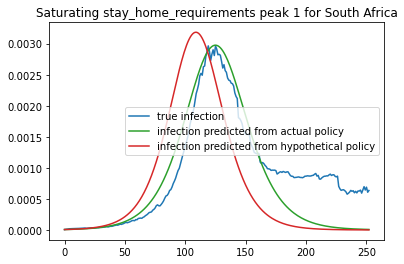

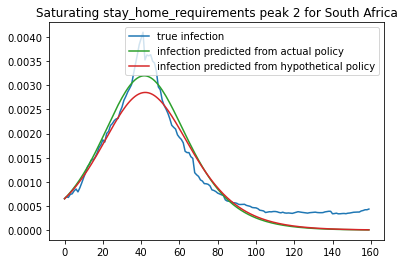

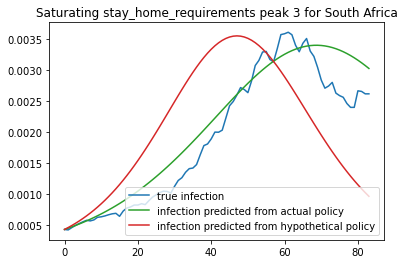

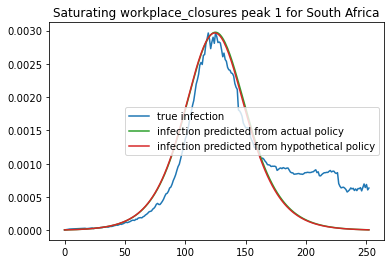

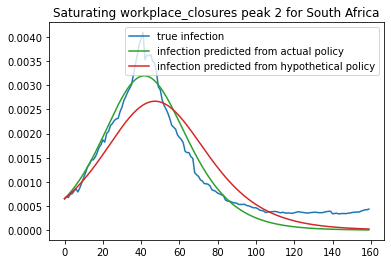

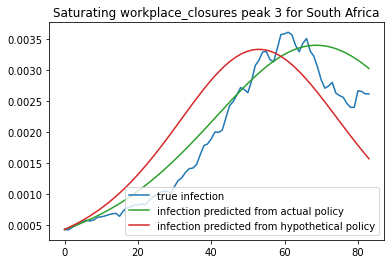

In [17]:
for i in range(len(predict1_1)):
    plt.title('Saturating '+policy_name[i]+' peak 1 for South Africa')
    plot4(inf1,rem1,y_predict3_1[-1],predict3_1[i])
    plt.title('Saturating '+policy_name[i]+' peak 2 for South Africa')
    plot4(inf2,rem2,y_predict3_2[-1],predict3_1[i])
    plt.title('Saturating '+policy_name[i]+' peak 3 for South Africa')
    plot4(inf3,rem3,y_predict3_3[-1],predict3_1[i])

# The effect of removing polices

## model3

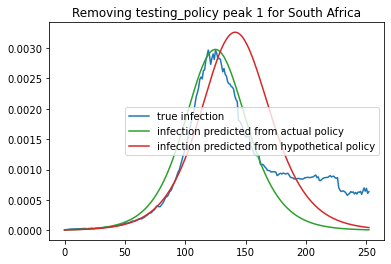

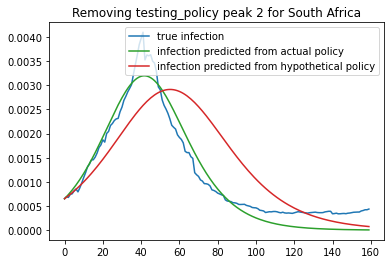

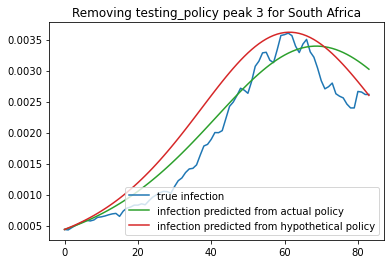

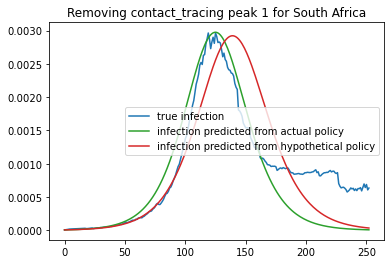

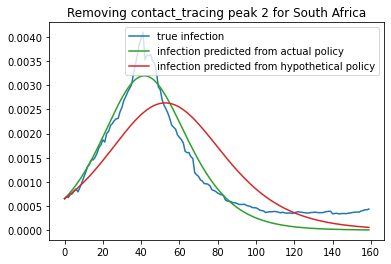

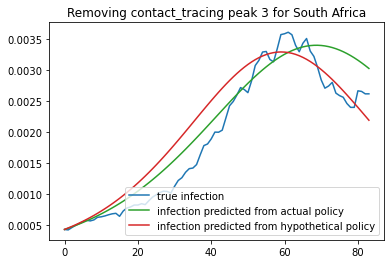

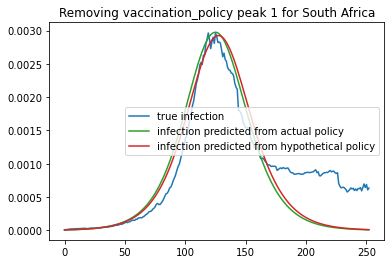

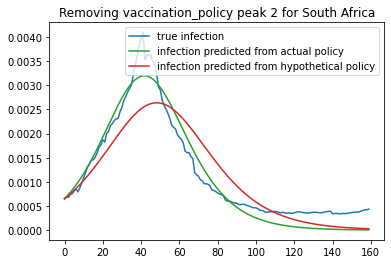

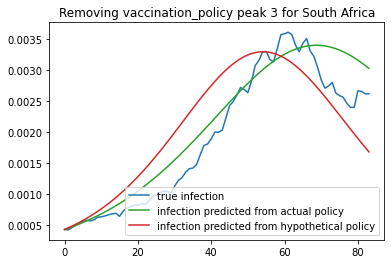

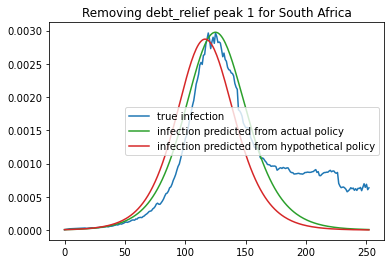

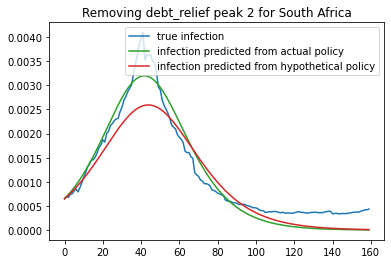

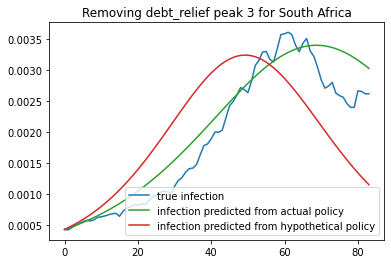

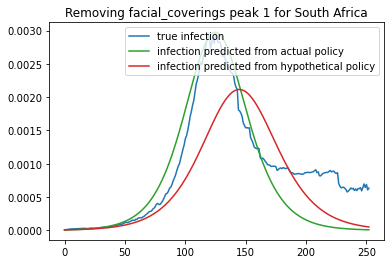

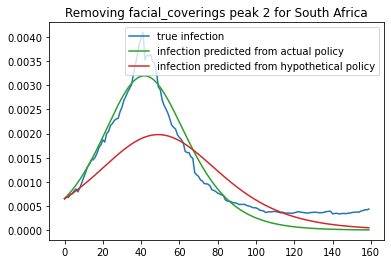

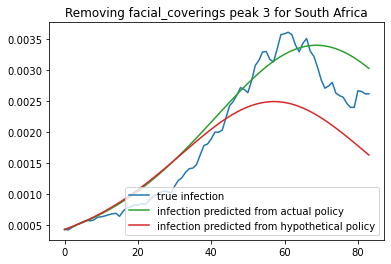

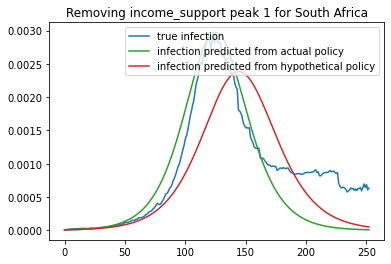

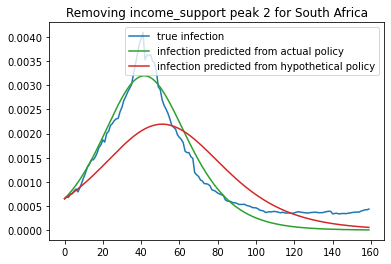

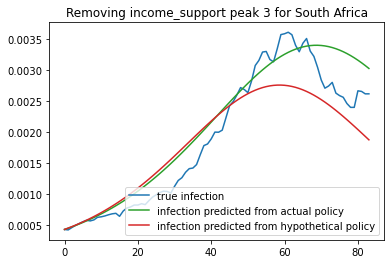

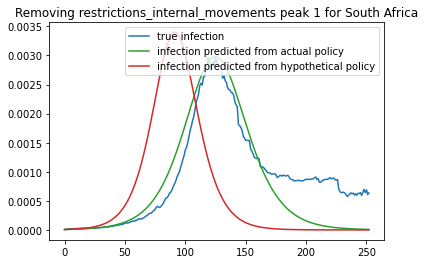

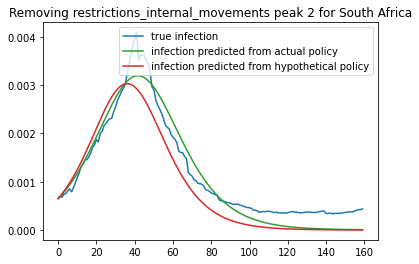

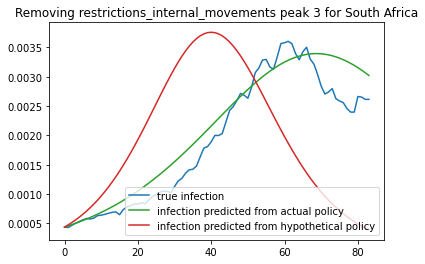

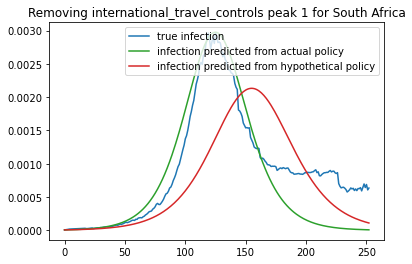

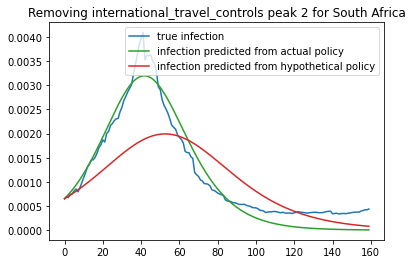

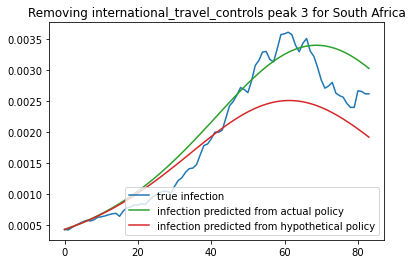

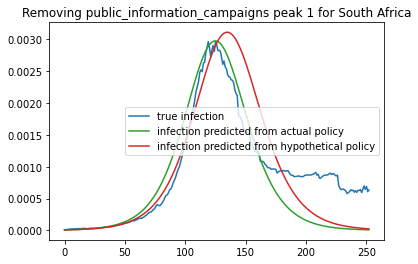

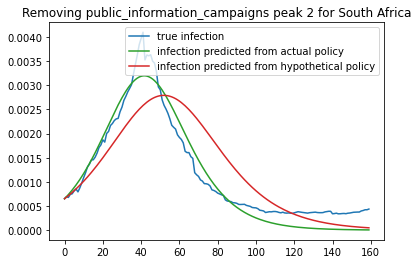

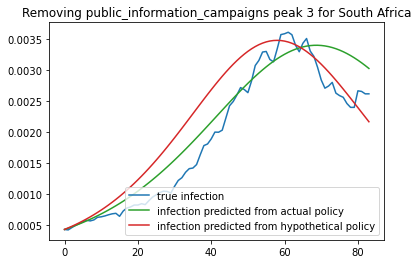

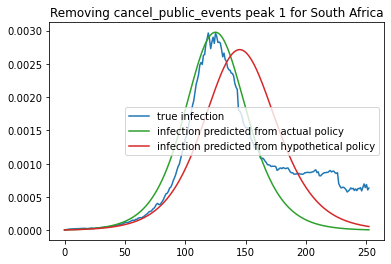

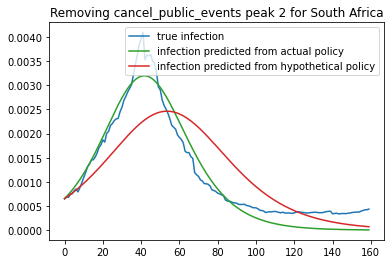

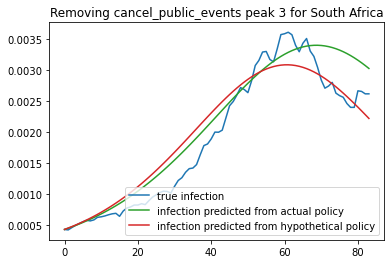

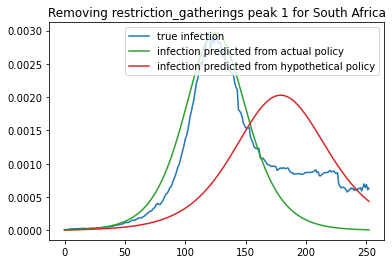

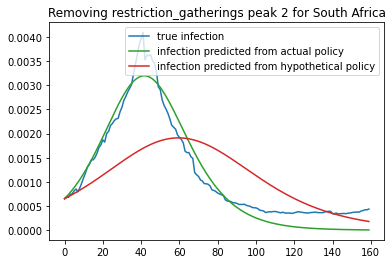

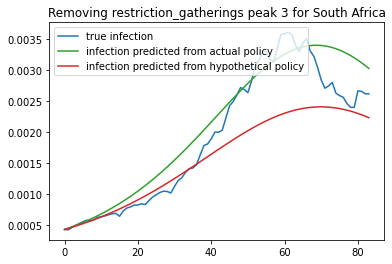

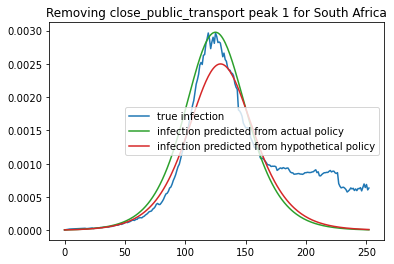

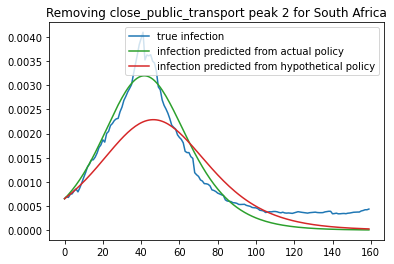

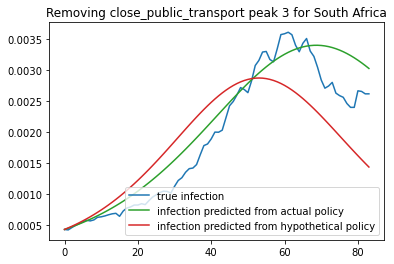

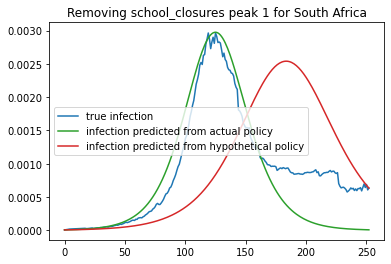

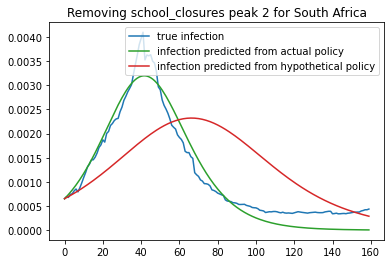

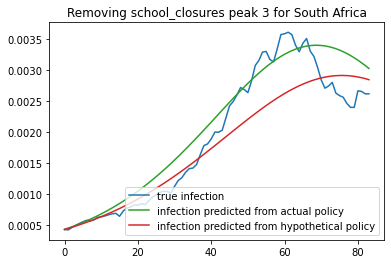

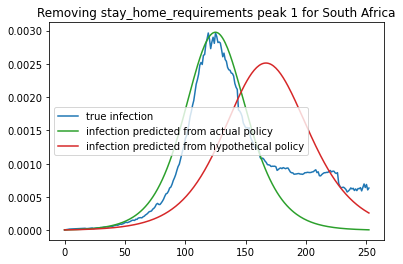

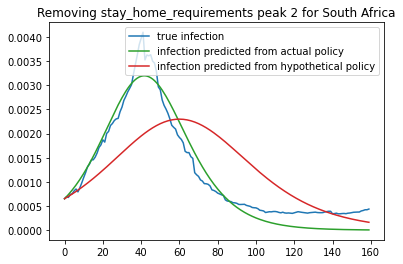

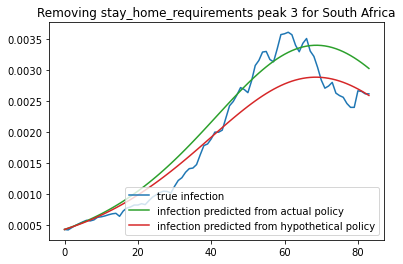

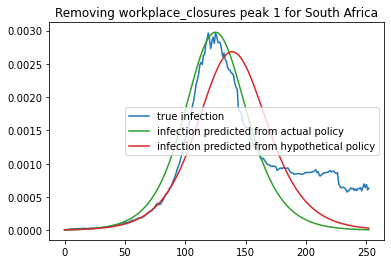

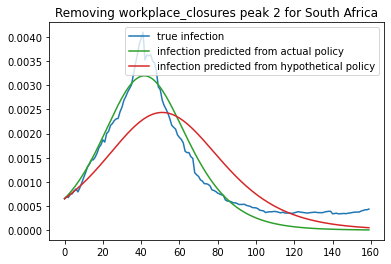

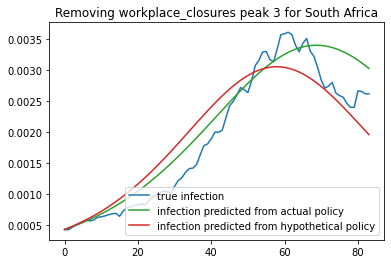

In [22]:
for i in range(len(predict1_1)):
    plt.title('Removing '+policy_name[i]+' peak 1 for South Africa')
    plot4(inf1,rem1,y_predict3_1[-1],predict_low3_1[i])
    plt.title('Removing '+policy_name[i]+' peak 2 for South Africa')
    plot4(inf2,rem2,y_predict3_2[-1],predict_low3_1[i])
    plt.title('Removing '+policy_name[i]+' peak 3 for South Africa')
    plot4(inf3,rem3,y_predict3_3[-1],predict_low3_1[i])